In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
stocks=input("enter the code of the stocks:-")
data=yf.download(stocks,"2008-01-01","2023-01-01",auto_adjust=True)
data.head()


enter the code of the stocks:-GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [3]:
data.shape

(3775, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2008-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3775 non-null   float64
 1   High    3775 non-null   float64
 2   Low     3775 non-null   float64
 3   Close   3775 non-null   float64
 4   Volume  3775 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.0 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,1379.192557,1386.536186,1371.297934,1379.010596,5449.633907
std,294.943510,296.258917,293.708702,295.055009,28849.245674
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1200.450012,1206.099976,1195.549988,1200.350037,45.000000
50%,1310.400024,1315.500000,1305.800049,1309.900024,148.000000
75%,1649.900024,1659.950012,1638.299988,1648.699951,482.000000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


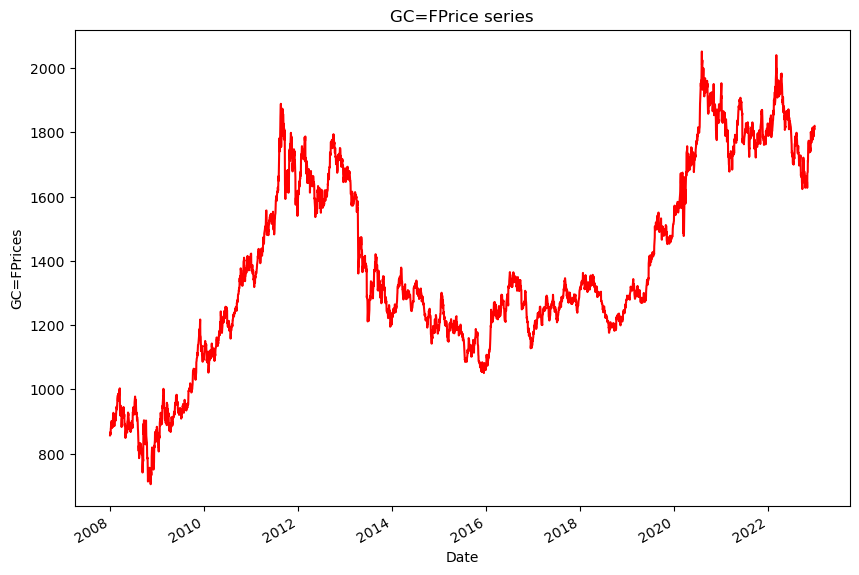

In [6]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{}Prices".format(stocks))
plt.title("{}Price series".format(stocks))
plt.show()

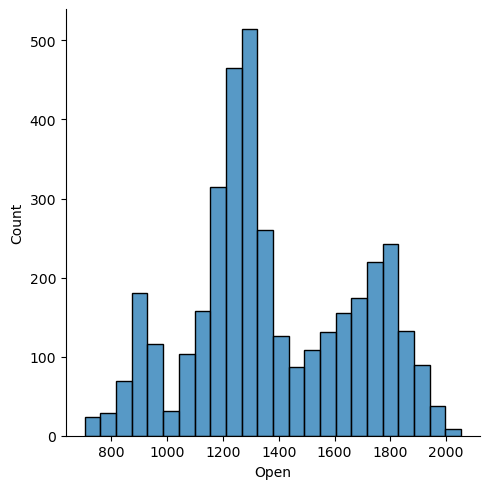

In [7]:
sns.displot(data["Open"])

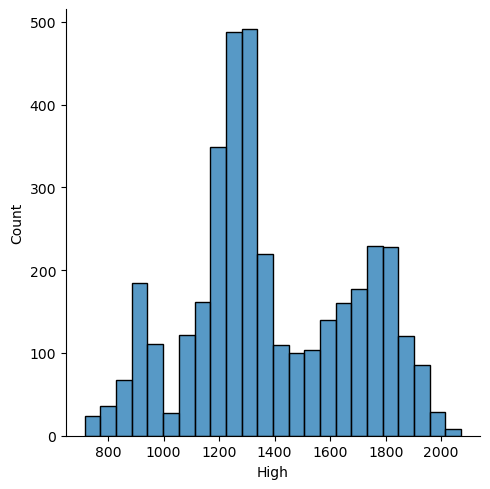

In [8]:
sns.displot(data["High"])

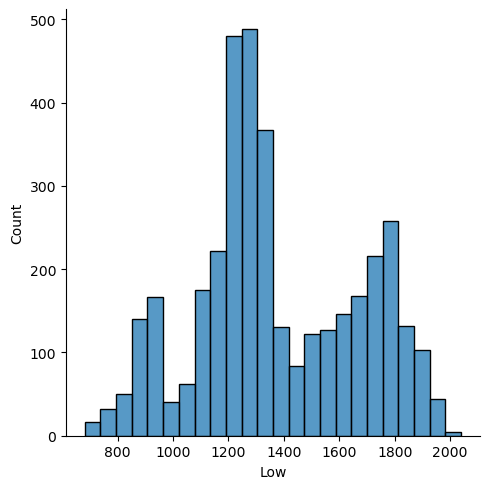

In [9]:
sns.displot(data["Low"])

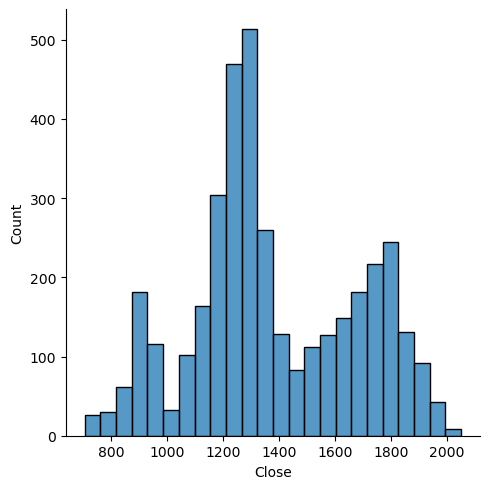

In [10]:
sns.displot(data["Close"])

In [11]:
x=data.drop("Close",axis=1)
y=data["Close"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3020, 4)
(755, 4)
(3020,)
(755,)


In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error,r2_score
def calculate_metrics(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2_scors=r2_score(y_test,y_pred)
    print("MSE:-",mse)
    print("RMSE:-",rmse)
    print("R2_Score:-",r2_scors)
calculate_metrics(y_test,pred1)

MSE:- 28.005403192588382
RMSE:- 5.29201315121083
R2_Score:- 0.9996875496154486


In [14]:
from sklearn.linear_model import Lasso, Ridge
la=Lasso().fit(x_train,y_train)
ri=Ridge().fit(x_train,y_train)
la_p=la.predict(x_test)
ri_p=ri.predict(x_test)


/Users/santosbista/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.360e+04, tolerance: 2.609e+04
  model = cd_fast.enet_coordinate_descent(


In [15]:
calculate_metrics(y_test, la_p)


MSE:- 51.62732340207823
RMSE:- 7.1852156127758775
R2_Score:- 0.9994240048272326


In [16]:
calculate_metrics(y_test, ri_p)

MSE:- 28.00540305693283
RMSE:- 5.2920131383938225
R2_Score:- 0.9996875496169622


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.068 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.053 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.038 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.059 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.068 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.053 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.038 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.059 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.058 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.068 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   0.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.031 total time=   0.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.020 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.026 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.017 total time=   0.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.017 total time=   0.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.271 total time=   0.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.257 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.293 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)